# **Type of Wheat - Multiclass Classification**

<div style="text-align: center;">
  <img src="misc/banner.gif" style="width: 100%; height: 400px" />
</div>

# Machine Learning Lifecycle Overview

<img src="misc/cropped_image.png" align="left"/>

### Machine Learning Life Cycle
1. **Business Problem** - Understanding the problem and defining project objectives.
2. **Data Sourcing & ETL** - Collecting and preprocessing data from various sources.
3. **Exploratory Data Analysis (EDA)** - Analyzing data quality, distribution, correlations, etc.
4. **Data Preparation** - Splitting data, handling missing values, feature engineering.
5. **Model Training & Selection** - Training models, tuning hyperparameters, evaluating performance.
6. **Deployment & Monitoring** - Deploying the model into production and monitoring performance.

# Business Problem
<a id='1'></a>
The goal of this project is to build a machine learning model that can classify wheat kernels into three different types: Kama, Rosa, and Canadian. 
Understanding the geometric properties of wheat kernels allows for improved categorization, which is useful in the agriculture and food processing industries.

# Data Sourcing and ETL
<a id='2'></a>
The dataset consists of geometric parameters of wheat kernels, including:
- **Area**: Area of the wheat kernel.
- **Perimeter**: Perimeter of the wheat kernel.
- **Compactness**: Compactness calculated as `4*pi*Area/Perimeter^2`.
- **Length**: Length of the kernel.
- **Width**: Width of the kernel.
- **AsymmetryCoeff**: Asymmetry coefficient.
- **Groove**: Length of kernel groove.
- **Type**: Categorical variable representing three wheat types: 1 (Kama), 2 (Rosa), and 3 (Canadian).

# **Task 1: Exploratory Data Analysis (EDA)**

### Step 1: Load the Dataset

In [13]:
import pandas as pd

# Load the dataset
df = pd.read_csv('data/03_Wheat_Seeds.csv')

# Display the first few rows of the dataset
df.head()

,Area,Perimeter,Compactness,Length,Width,AsymmetryCoeff,Groove,Type
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


The dataset contains 199 rows and 8 columns, representing geometric features of wheat kernels.

The Type column is the target variable, categorizing kernels into three types (1, 2, 3).

Features include area, perimeter, compactness, length, width, asymmetry coefficient, and groove length.

### Step 2: Inspect the Dataset

In [14]:
# Get the shape of the dataset
print(f"Dataset contains {df.shape[0]} rows and {df.shape[1]} columns.")

# Display the column names
print("Column names:", df.columns.tolist())

# Display data types 
df.info()

# Display basic statistics
df.describe(include='all')

Dataset contains 199 rows and 8 columns.
Column names: ['Area', 'Perimeter', 'Compactness', 'Length', 'Width', 'AsymmetryCoeff', 'Groove', 'Type']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199 entries, 0 to 198
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Area            199 non-null    float64
 1   Perimeter       199 non-null    float64
 2   Compactness     199 non-null    float64
 3   Length          199 non-null    float64
 4   Width           199 non-null    float64
 5   AsymmetryCoeff  199 non-null    float64
 6   Groove          199 non-null    float64
 7   Type            199 non-null    int64  
dtypes: float64(7), int64(1)
memory usage: 12.6 KB


,Area,Perimeter,Compactness,Length,Width,AsymmetryCoeff,Groove,Type
count,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000
mean,14.918744,14.595829,0.870811,5.643151,3.265533,3.699217,5.420653,1.994975
std,2.919976,1.310445,0.023320,0.443593,0.378322,1.471102,0.492718,0.813382
min,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000,1.000000
25%,12.330000,13.470000,0.857100,5.267000,2.954500,2.570000,5.046000,1.000000
50%,14.430000,14.370000,0.873400,5.541000,3.245000,3.631000,5.228000,2.000000
75%,17.455000,15.805000,0.886800,6.002000,3.564500,4.799000,5.879000,3.000000
max,21.180000,17.250000,0.918300,6.675000,4.033000,8.315000,6.550000,3.000000


All columns are numerical, making the dataset ready for machine learning without additional encoding.

Statistical summary (df.describe()): 
- Mean & Standard Deviation: Provides insights into data distribution.
- Min & Max values: Helps detect potential outliers.
- Quartiles (25%, 50%, 75%): Shows feature spread and variability.

The dataset confirms a multiclass classification problem.

In [15]:
# Check for missing values
missing_values = df.isnull().sum()

# Display the number of missing values in each column
print("Missing values in each column:")
print(missing_values)

Missing values in each column:
Area              0
Perimeter         0
Compactness       0
Length            0
Width             0
AsymmetryCoeff    0
Groove            0
Type              0
dtype: int64


No missing values detected, ensuring clean data with no need for imputation.

### Step 3: Summary Statistics

In [16]:
# Display summary statistics
summary_statistics = df.describe(include='all')
print("Summary statistics:\n", summary_statistics)

Summary statistics:
              Area   Perimeter  Compactness      Length       Width  \
count  199.000000  199.000000   199.000000  199.000000  199.000000   
mean    14.918744   14.595829     0.870811    5.643151    3.265533   
std      2.919976    1.310445     0.023320    0.443593    0.378322   
min     10.590000   12.410000     0.808100    4.899000    2.630000   
25%     12.330000   13.470000     0.857100    5.267000    2.954500   
50%     14.430000   14.370000     0.873400    5.541000    3.245000   
75%     17.455000   15.805000     0.886800    6.002000    3.564500   
max     21.180000   17.250000     0.918300    6.675000    4.033000   

       AsymmetryCoeff      Groove        Type  
count      199.000000  199.000000  199.000000  
mean         3.699217    5.420653    1.994975  
std          1.471102    0.492718    0.813382  
min          0.765100    4.519000    1.000000  
25%          2.570000    5.046000    1.000000  
50%          3.631000    5.228000    2.000000  
75%         

**Feature Ranges:**
- Area: 10.5 - 21.8 (broad variation).
- Groove Length: 4.5 - 6.5 (more concentrated).
- Compactness: 0.80 - 0.91 (narrow range, potentially less significant).

**Key Observations:**
- Features like asymmetry coefficient and groove length have higher variability, making them potentially useful for classification.
- The Type variable confirms a 3-class classification task.

### Step 4: Visualize the Data

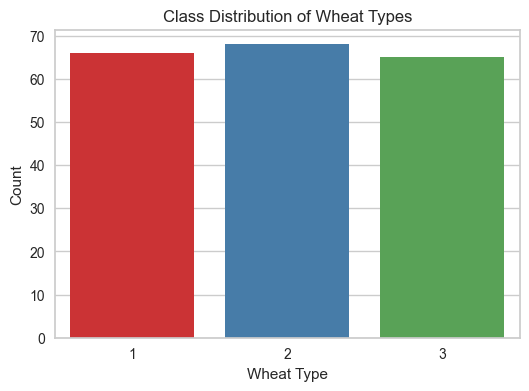

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
sns.countplot(x='Type', data=df, palette="Set1") 
plt.title("Class Distribution of Wheat Types")
plt.xlabel("Wheat Type")
plt.ylabel("Count")
plt.show()


**Insights:**

The dataset has a balanced distribution among the three wheat types (Kama, Rosa, and Canadian).

A balanced dataset helps prevent bias in the machine learning model, ensuring equal performance across all classes.

This ensures the model does not favor one class over another.

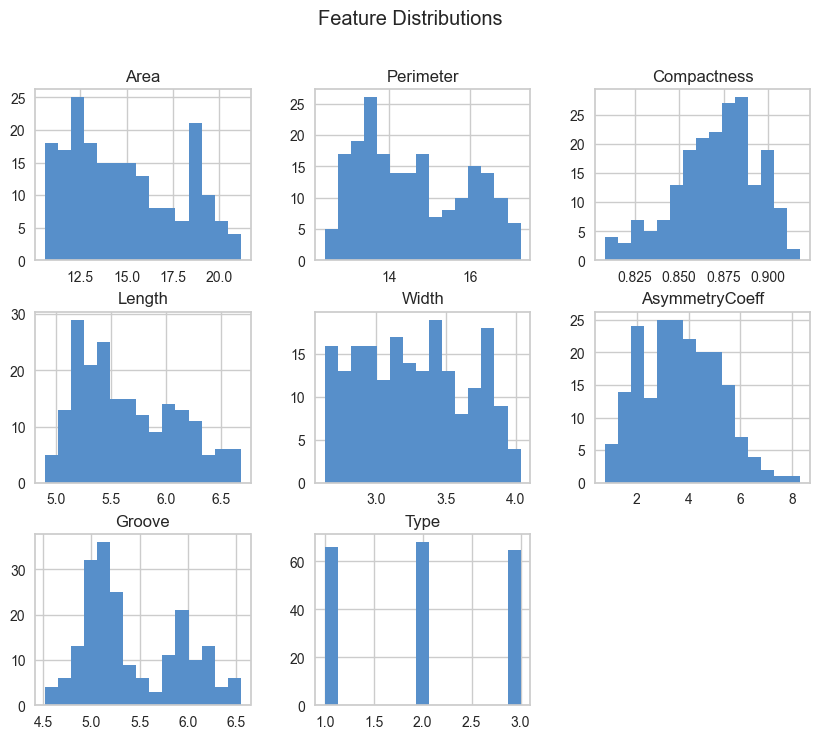

In [18]:
# Plot histograms for each feature
df.hist(figsize=(10, 8), bins=15, color="#578FCA")  # Change to your preferred hex color
plt.suptitle("Feature Distributions")
plt.show()

**Insights:**

The histograms show the distribution of numerical features such as Area, Perimeter, Compactness, Length, Width, Asymmetry Coefficient, and Groove.

Most features follow a normal distribution, while some have skewed distributions.

Compactness and Asymmetry Coefficient exhibit more unique distributions, potentially making them important for classification.

Length and Width appear to be normally distributed and might be correlated.

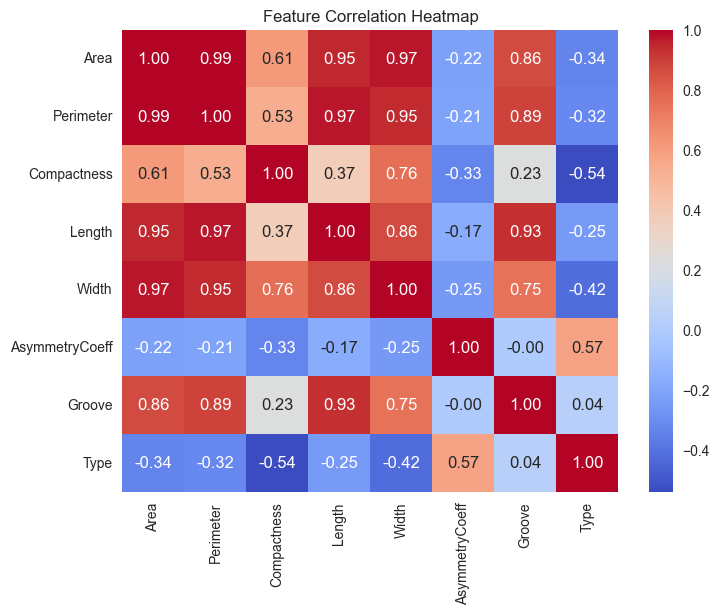

In [19]:
# Correlation Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Feature Correlation Heatmap")
plt.show()

**Insights:**

Area, Perimeter, Length, and Width are highly correlated, meaning they provide similar information.

Asymmetry Coefficient and Groove have weaker correlations with other features, meaning they may contribute unique information.

This correlation analysis helps in feature selection, where highly correlated features may be dropped to reduce redundancy and improve model efficiency.

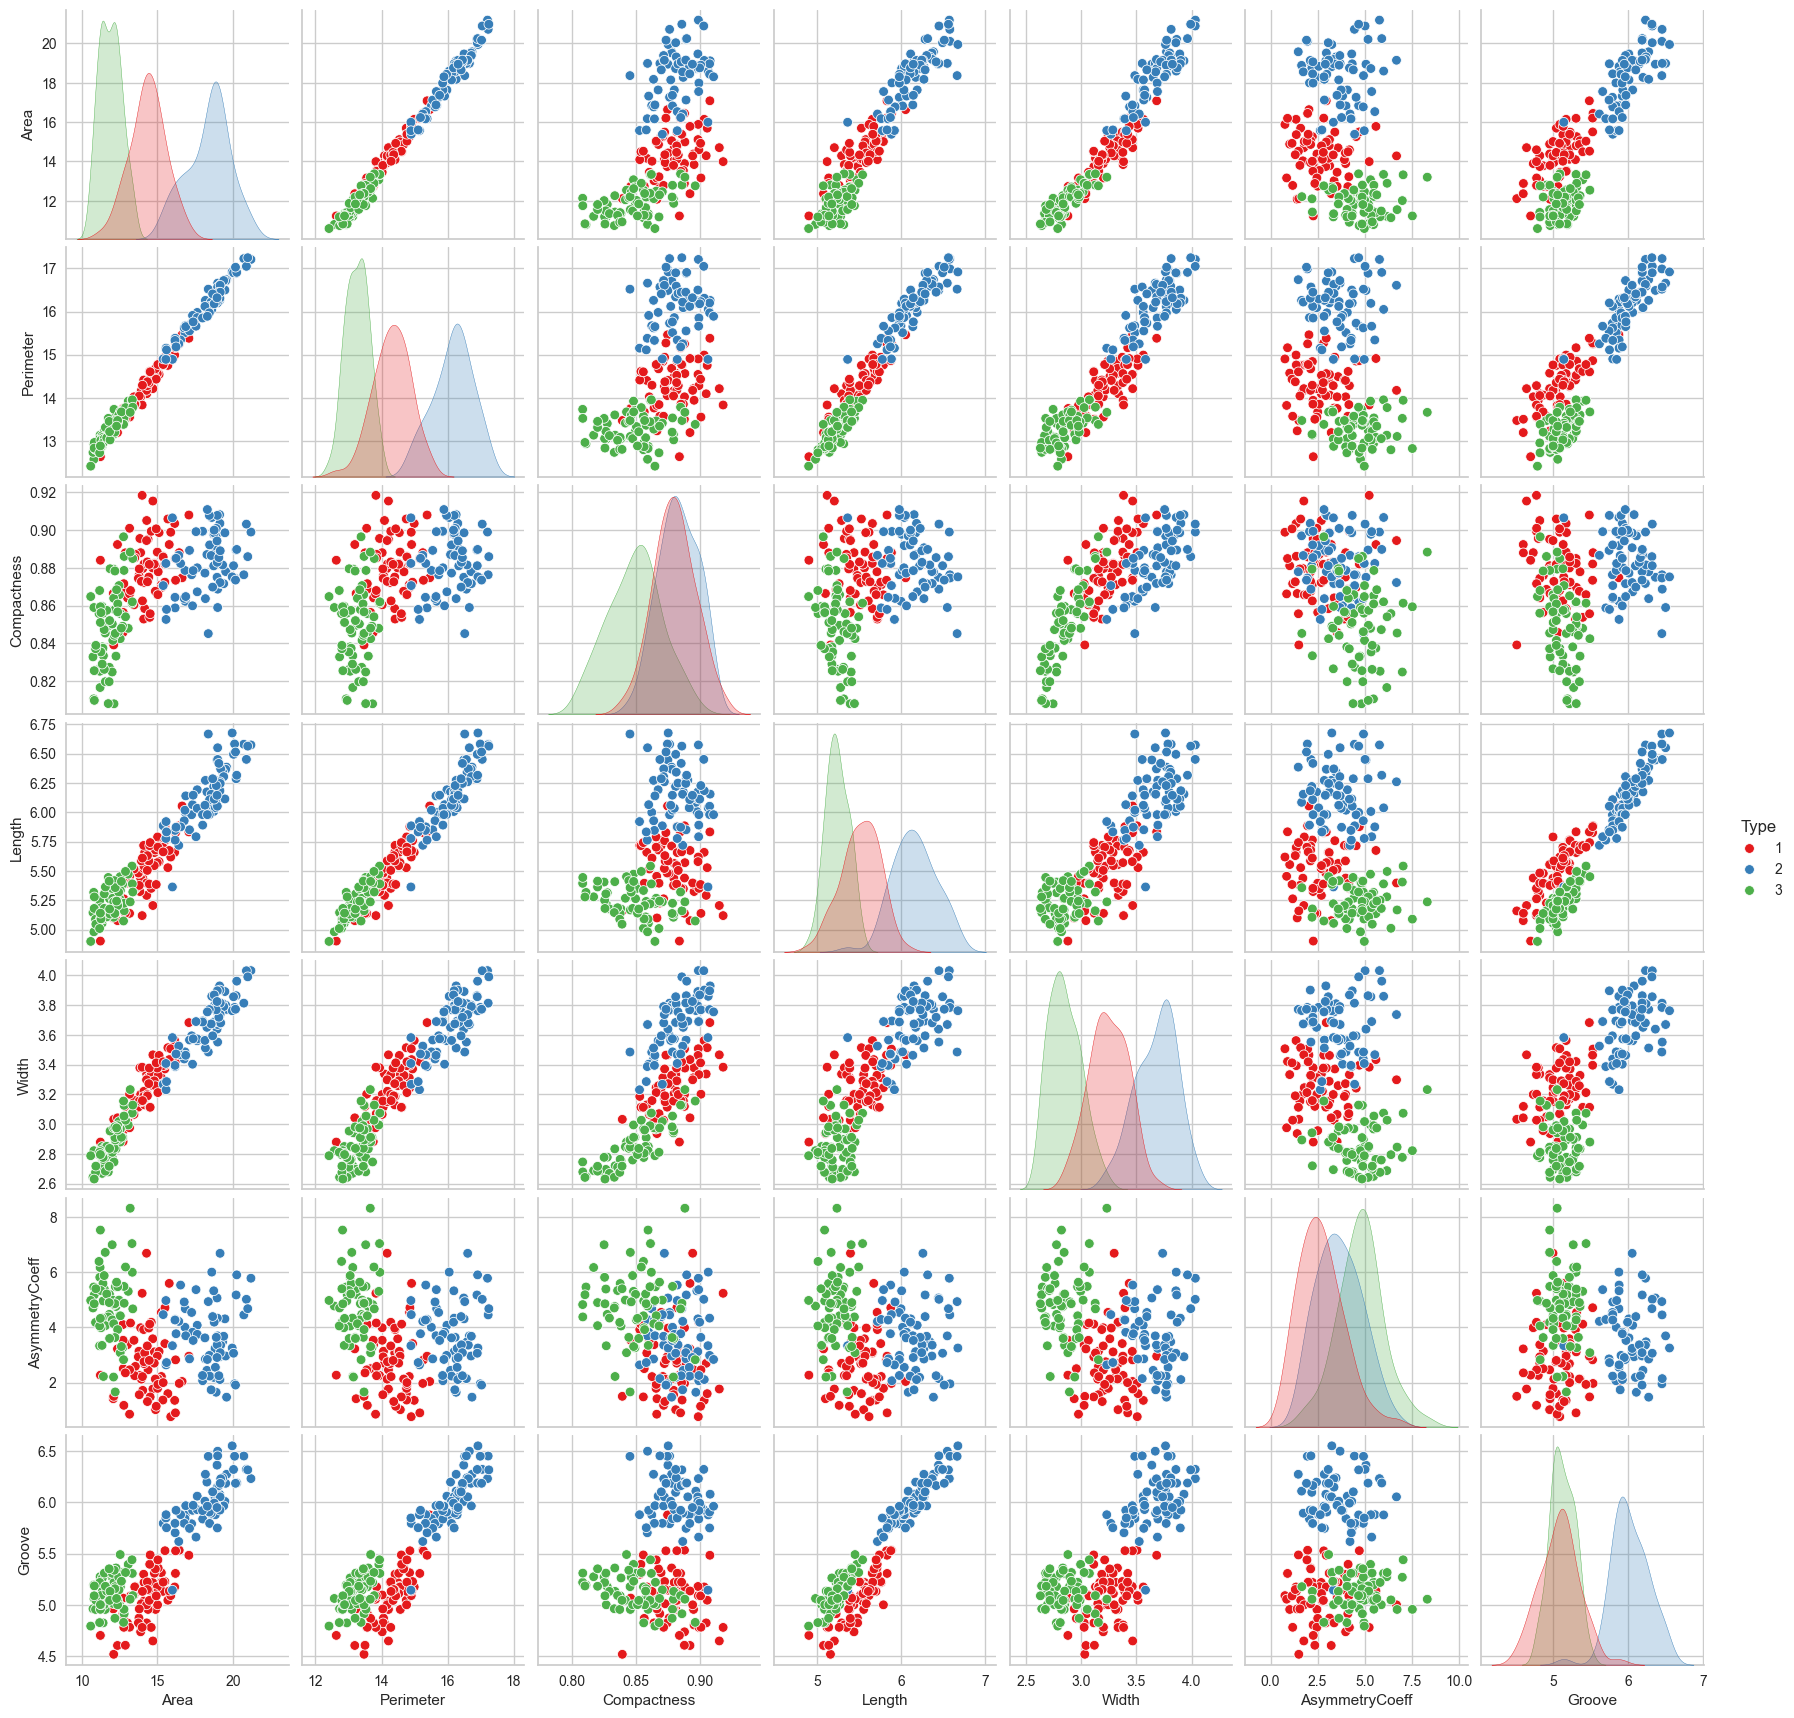

In [20]:
sns.pairplot(df, hue="Type", diag_kind="kde", palette="Set1")
plt.show()

**Insights:**

The pairplot reveals clusters for different wheat types, which means some features effectively separate the classes.

Groove vs Length and Perimeter vs Width show distinct separations, making them good candidates for classification.

Some feature pairs show strong linear relationships, indicating that these features are redundant and may not all be needed in the final model.

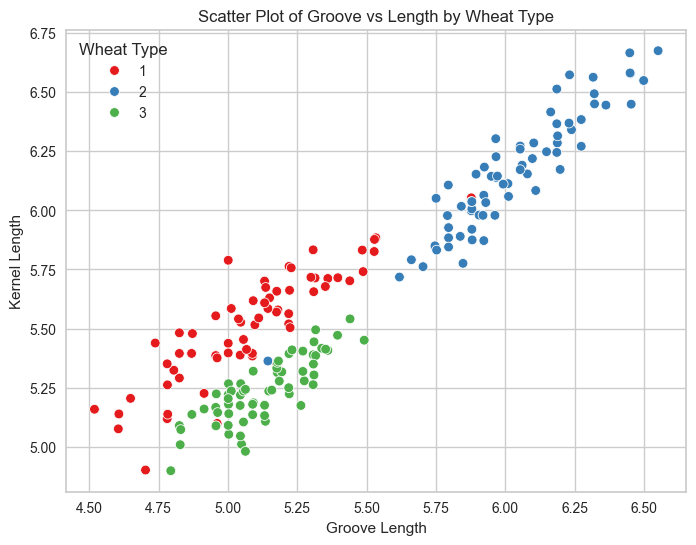

In [21]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x="Groove", y="Length", hue="Type", data=df, palette="Set1")
plt.title("Scatter Plot of Groove vs Length by Wheat Type")
plt.xlabel("Groove Length")
plt.ylabel("Kernel Length")
plt.legend(title="Wheat Type")
plt.show()

**Insights:**
Groove vs Length shows a clear separation between different wheat types.

Distinct clustering suggests these features are highly important in differentiating wheat types.

This plot confirms that Groove and Length are strong distinguishing features.

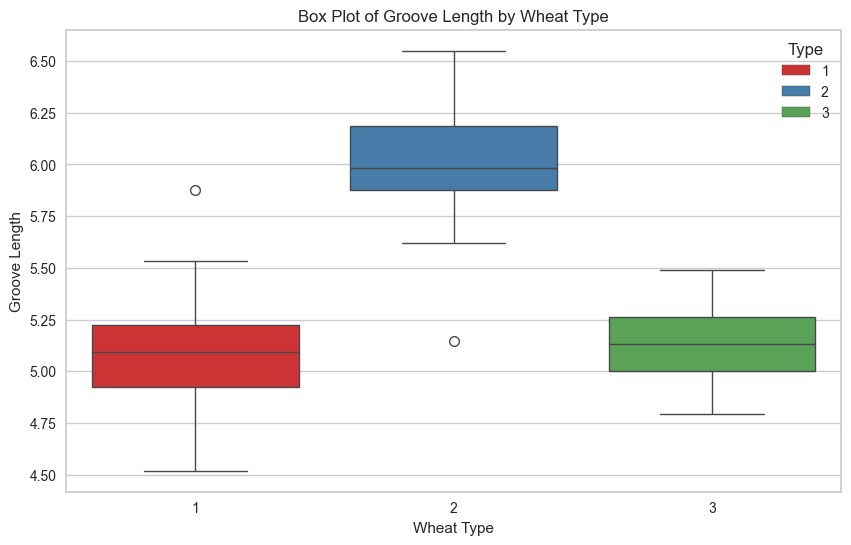

In [22]:
plt.figure(figsize=(10, 6))
sns.boxplot(x="Type", y="Groove", hue="Type", data=df, palette="Set1")
plt.title("Box Plot of Groove Length by Wheat Type")
plt.xlabel("Wheat Type")
plt.ylabel("Groove Length")
plt.show()


**Insights:**

The Groove length varies significantly between different wheat types.

This feature appears to be a strong differentiator between wheat types.

Outliers are present, which may require additional preprocessing (e.g., normalization or scaling).

# **Task 2: Machine Learning Pipeline Using PyCaret**

### Step 1: Convert Data Types (Preprocessing)

In [23]:
# Import necessary libraries
import pandas as pd
import mlflow
from sklearn.preprocessing import StandardScaler

# Set MLFlow tracking
mlflow.set_tracking_uri("http://localhost:5000")
print("MLFlow Tracking URI Set to:", mlflow.get_tracking_uri())

# Load dataset
df = pd.read_csv('data/03_Wheat_Seeds.csv')

# Normalize features (excluding 'Type')
scaler = StandardScaler()
df.iloc[:, :-1] = scaler.fit_transform(df.iloc[:, :-1])  # Normalize all columns except 'Type'

# Display first few rows
df.head()

MLFlow Tracking URI Set to: http://localhost:5000


,Area,Perimeter,Compactness,Length,Width,AsymmetryCoeff,Groove,Type
0,0.117164,0.186797,0.008144,0.270860,0.123135,-1.007371,-0.408265,1
1,-0.013302,-0.019760,0.442341,-0.201481,0.178783,-1.827187,-0.945420,1
2,-0.215868,-0.386972,1.469798,-0.795861,0.189383,-0.681625,-1.211962,1
3,-0.370368,-0.501725,1.061395,-0.721281,0.300679,-0.981475,-1.252656,1
4,0.419297,0.301550,1.401014,0.033559,0.785615,-1.597530,-0.499825,1


**Key Actions Taken**
- Imported necessary libraries such as pandas, mlflow, and StandardScaler for data manipulation and normalization.
- Set up MLFlow tracking (http://localhost:5000) to log experiments.
- Loaded the dataset (03_Wheat_Seeds.csv) into a DataFrame.
- Normalized all numerical features using StandardScaler to ensure features are on the same scale, which prevents bias toward attributes with larger numerical values.

**Why is this important?**
- MLFlow Tracking: Helps in experiment logging, making it easier to track different model iterations.
- Normalization: Ensures consistent scaling across features, improving model convergence and performance.
- Data Integrity: Checking the first few rows helps validate data loading before moving forward.

### Step 2: Initialize PyCaret Environment

In [24]:
from pycaret.classification import *

# Initialize PyCaret for classification
clf = setup(
    data=df, 
    target='Type', 
    session_id=123, 
    normalize=True,  
    fix_imbalance=True,  
    log_experiment=True, 
    experiment_name='wheat_classification',
    fold_strategy="kfold"  # Enables k-fold cross-validation
    )


,Description,Value
0,Session id,123
1,Target,Type
2,Target type,Multiclass
3,Target mapping,"1: 0, 2: 1, 3: 2"
4,Original data shape,"(199, 8)"
5,Transformed data shape,"(204, 8)"
6,Transformed train set shape,"(144, 8)"
7,Transformed test set shape,"(60, 8)"
8,Numeric features,7
9,Preprocess,True


**Key Actions Taken**

Used setup() to initialize the machine learning pipeline with the following configurations:
- Target Variable: Type (multiclass classification problem).
- Session ID: Set to 123 for reproducibility.
- Normalization: Applied (True) to keep feature values consistent.
- Fix Imbalance: Applied SMOTE to handle any class imbalance.
- K-Fold Cross-Validation: Implemented using "kfold" strategy.

**Why is this important?**
- Feature Selection Not Applied: Feature selection was deliberately not used as it significantly reduced accuracy (from ~97% to 71%). Based on Exploratory Data Analysis (EDA), all features contribute meaningfully to the classification task. Removing any features would negatively impact the model's ability to distinguish between classes effectively.
- Fixing Class Imbalance: Ensures minority classes are well-represented in training, improving model generalization.
- K-Fold Cross-Validation: Splits the dataset into multiple folds, reducing the risk of overfitting and providing a more robust evaluation.

By keeping all features, the model retains maximum predictive power, leading to higher accuracy and better overall performance.

### Step 3: Train & Compare Models

In [25]:
# Compare models and choose the best one
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ridge,Ridge Classifier,0.9857,0.0000,0.9857,0.9882,0.9857,0.9776,0.9791,0.0140
lda,Linear Discriminant Analysis,0.9714,0.0000,0.9714,0.9773,0.9708,0.9556,0.9590,0.0120
qda,Quadratic Discriminant Analysis,0.9429,0.0000,0.9429,0.9608,0.9394,0.9130,0.9221,0.0130
lr,Logistic Regression,0.9357,0.0000,0.9357,0.9468,0.9333,0.9001,0.9067,0.6770
dt,Decision Tree Classifier,0.9357,0.9542,0.9357,0.9515,0.9356,0.9021,0.9093,0.0160
catboost,CatBoost Classifier,0.9357,0.9993,0.9357,0.9537,0.9350,0.9013,0.9100,1.3420
et,Extra Trees Classifier,0.9286,0.9993,0.9286,0.9523,0.9251,0.8911,0.9030,0.0410
rf,Random Forest Classifier,0.9280,0.9959,0.9280,0.9493,0.9239,0.8898,0.9011,0.0490
gbc,Gradient Boosting Classifier,0.9280,0.0000,0.9280,0.9391,0.9252,0.8859,0.8933,0.0660
xgboost,Extreme Gradient Boosting,0.9280,0.9911,0.9280,0.9507,0.9283,0.8902,0.9002,0.2640


**Key Actions Taken**
- Used compare_models() to evaluate various models and select the best-performing one.
- The best model was Ridge Classifier with 98.57% accuracy.
- Models such as Linear Discriminant Analysis and Quadratic Discriminant Analysis also performed well but were slightly less accurate.

**Why is this important?**
- Automated Model Selection: PyCaret quickly compares different models based on metrics like accuracy, AUC, F1-score, etc.
- Model Performance Metrics: Accuracy is a key indicator, but other metrics like AUC (for ROC curves), F1-score (for balance between precision and recall), and MCC (for overall classification performance) are equally critical.

### Step 4: Best Model Performance Evaluation

#### 4.1: Class Report

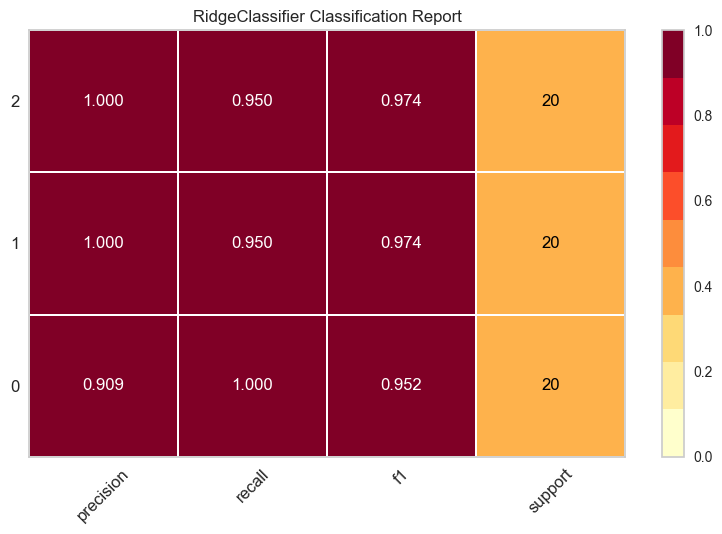

In [26]:
# plot class report
plot_model(best_model, plot = 'class_report')

The class report presents key performance metrics such as precision, recall, and F1-score for each class.

In this case, Ridge Classifier demonstrates high precision and recall for all classes.

A recall of 1.000 for class 0 means that all instances of class 0 were correctly classified.

The F1-score, which is a harmonic mean of precision and recall, is also very high, indicating a well-balanced model performance.

#### 4.2: Confusion Matrix

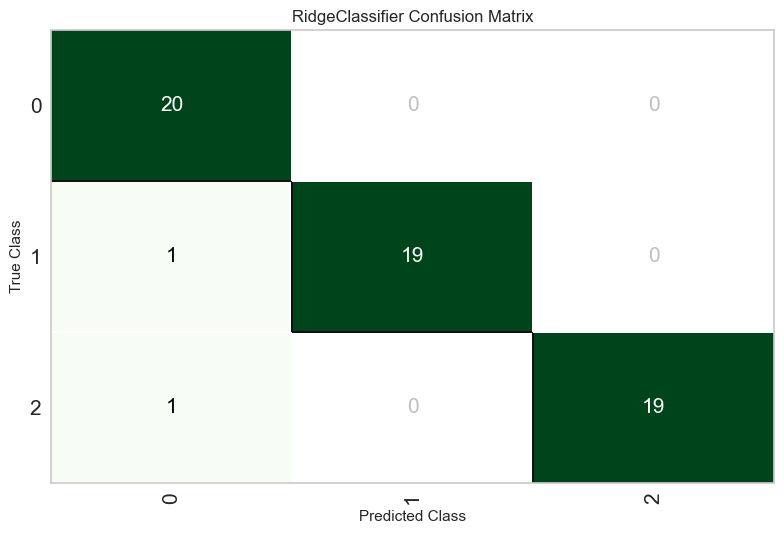

In [27]:
# Plot confusion matrix for the best model
plot_model(best_model, plot='confusion_matrix')

The confusion matrix helps visualize misclassifications and correct predictions.

The diagonal values represent the correctly classified samples.

There are very few misclassifications (only 1 instance of class 1 and class 2 were misclassified).

The model exhibits strong classification ability across all classes, making it highly reliable.

#### 4.3: Feature Importance

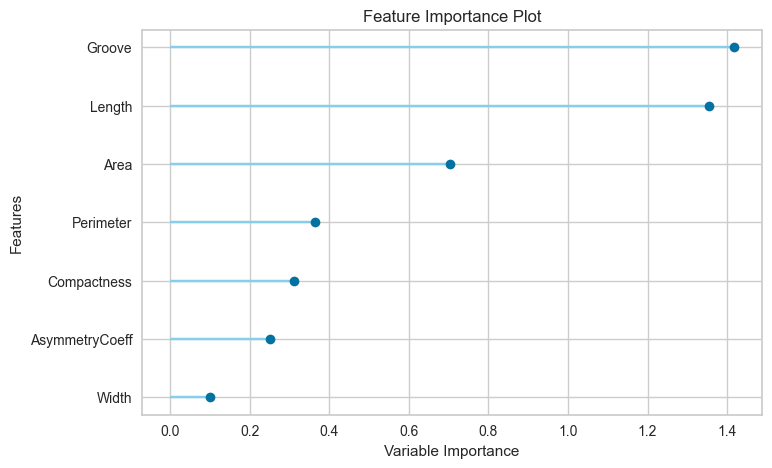

In [28]:
# Feature Importance
plot_model(best_model, plot='feature')

This plot shows which features had the most influence on the predictions.

Groove, Length, and Area appear to have the highest importance, meaning they contribute the most to the decision-making process.

Less important features such as Width and Compactness may have minimal impact on classification results.

#### 4.4: Error Analysis

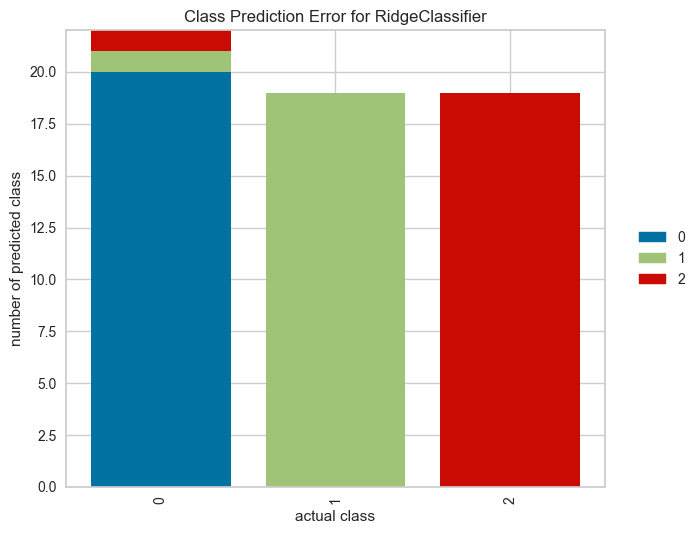

In [29]:
plot_model(best_model, plot='error')

The class prediction error plot helps visualize misclassifications.

It shows the number of times each class was incorrectly predicted as another class.

For class 0, most predictions were correct, with very few misclassifications.

This plot can help identify if one particular class is more prone to misclassification, which might require adjustments like class balancing.

### Step 5: Finalize & Save Best Model

In [30]:
# finalize the model
final_best = finalize_model(best_model)

# save model to disk
save_model(final_best, 'wheat-pipeline')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('label_encoding',
                  TransformerWrapperWithInverse(exclude=None, include=None,
                                                transformer=LabelEncoder())),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['Area', 'Perimeter', 'Compactness',
                                              'Length', 'Width',
                                              'AsymmetryCoeff', 'Groove'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_va...
                                                                               random_state=123,
                                                                               sampling_strategy='auto')))),
                 ('n

Afterward, I finalize the Ridge model using finalize_model and save the entire trained model pipeline to disk with the save_model function.

### Step 6: Consume Model With MLFlow

In [31]:
import mlflow
import pandas as pd

# Load the model from the specified run
logged_model = 'runs:/b950dc908b434b399f32dc37475e76d3/model'
loaded_model = mlflow.pyfunc.load_model(logged_model)

# Prepare the DataFrame by dropping the target column
df_predict = df.drop(columns=['Type'])

# Predict on the prepared DataFrame
predictions = loaded_model.predict(df_predict)

# Display the predictions
print(predictions)

2025/03/01 21:04:58 WARNING mlflow.pyfunc: The version of Python that the model was saved in, `Python 3.11.9`, differs from the version of Python that is currently running, `Python 3.10.11`, and may be incompatible


0      1
1      1
2      1
3      1
4      1
      ..
194    1
195    3
196    3
197    3
198    3
Name: Type, Length: 199, dtype: int8


In [32]:
# print pipeline
print(loaded_model)
pipeline = loaded_model

mlflow.pyfunc.loaded_model:
  artifact_path: model
  flavor: mlflow.sklearn
  run_id: b950dc908b434b399f32dc37475e76d3



To utilize the saved model, I load it from the MLFlow server using its specific run ID (b950dc908b43b399f32dc37475e76d3). 

The model is retrieved as a pipeline using mlflow.pyfunc.load_model(logged_model), ensuring it includes all preprocessing steps applied during training.

After loading the model, I prepare the DataFrame by removing the target column (Type). This step ensures that the model receives only the feature variables needed for prediction.

I then use the loaded model to generate predictions on this prepared dataset. The predicted class labels are displayed, providing classification results for each sample.

To verify the structure and components of the saved model, I print the loaded model pipeline. This confirms that the model was correctly retrieved and is ready for inference.

# **Task 3: Web Application Using Streamlit**

### Step 1: Install necessary library

In [33]:
!pip install streamlit

### Step 2: Create a Streamlit Script

In [34]:
%%writefile app.py
import streamlit as st
import pandas as pd
import pycaret.classification as pc

# Load the model
model = pc.load_model('wheat-pipeline')

st.set_page_config(page_title="Wheat Classification", layout="wide")

# Center the title
st.markdown(
    """
    <h1 style='text-align: center; font-size: 2.5em; font-weight: bold;'>🌾 Wheat Classification Predictor</h1>
    """,
    unsafe_allow_html=True
)

# Center the banner.gif using Streamlit's built-in layout system
col1, col2, col3 = st.columns([1, 3, 1])  

with col2:
    st.image("misc/banner.gif", use_container_width=True)  

st.divider()

# Center the prediction title
st.markdown(
    """
    <h2 style='text-align: center;'>Wheat Classification Prediction</h2>
    <p style='text-align: center;'>Enter the feature values to predict the wheat type:</p>
    """,
    unsafe_allow_html=True
)

# Center the text boxes and make them shorter
with st.container():
    col1, col2, col3 = st.columns([2, 3, 2])  
    
    with col2:
        area = st.number_input("Area", min_value=0.0, format="%.2f")
        perimeter = st.number_input("Perimeter", min_value=0.0, format="%.2f")
        compactness = st.number_input("Compactness", min_value=0.0, format="%.2f")
        length = st.number_input("Length", min_value=0.0, format="%.2f")
        width = st.number_input("Width", min_value=0.0, format="%.2f")
        asymmetry_coeff = st.number_input("Asymmetry Coefficient", min_value=0.0, format="%.2f")
        groove = st.number_input("Groove", min_value=0.0, format="%.2f")

# Add padding before the button
st.markdown("<br>", unsafe_allow_html=True)

# Create columns to center the button
col1, col2, col3 = st.columns([2, 1, 2])  

with col2:
    if st.button("Predict", use_container_width=True):  
        # Prepare input data as DataFrame
        input_data = pd.DataFrame(
            [[area, perimeter, compactness, length, width, asymmetry_coeff, groove]],
            columns=["Area", "Perimeter", "Compactness", "Length", "Width", "AsymmetryCoeff", "Groove"]
        )
        
        # Make predictions
        prediction = model.predict(input_data)
        
        # Display prediction
        st.success(f"Predicted Wheat Type: {prediction[0]}")

# Center the footer
st.markdown(
    """
    <div style="text-align: center;">
        <hr>
        <p>🛠️ Developed by <b>Natelie</b></p>
        <p>📅 Project: AI Wheat Classification</p>
    </div>
    """,
    unsafe_allow_html=True
)


Overwriting app.py


### Step 3: Run the Streamlit Application

In [35]:
# run this in a terminal: streamlit run app.py